In [2]:
%matplotlib inline


# OT for image color adaptation with mapping estimation

OT for domain adaptation with image color adaptation [6] with mapping
estimation [8].

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014). Regularized
discrete optimal transport. SIAM Journal on Imaging Sciences, 7(3), 1853-1882.

[8] M. Perrot, N. Courty, R. Flamary, A. Habrard, "Mapping estimation for
discrete optimal transport", Neural Information Processing Systems (NIPS), 2016.


In [1]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 3
import os
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
import ot

rng = np.random.RandomState(42)


def im2mat(img):
    """Converts and image to matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(img):
    return np.clip(img, 0, 1)

## Generate data



In [9]:
# Loading images
# this_file = os.path.realpath('__file__')
# data_path = os.path.join(Path(this_file).parent.parent.parent, 'data')

# I1 = plt.imread(os.path.join(data_path, 'sunset1.jpg')).astype(np.float64) / 256
# I2 = plt.imread(os.path.join(data_path, 'sunset2.jpg')).astype(np.float64) / 256

I1 = plt.imread('dku2.jpeg').astype(np.float64) / 256
I2 = plt.imread('blueness.jpeg').astype(np.float64) / 256


X1 = im2mat(I1)
X2 = im2mat(I2)

# training samples
nb = 500
idx1 = rng.randint(X1.shape[0], size=(nb,))
idx2 = rng.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

In [10]:
I1.shape
I2.shape

(225, 225, 3)

## Domain adaptation for pixel distribution transfer



In [11]:
# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=X1)
Image_emd = minmax(mat2im(transp_Xs_emd, I1.shape))

# SinkhornTransport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=X1)
Image_sinkhorn = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))

ot_mapping_linear = ot.da.MappingTransport(
    mu=1e0, eta=1e-8, bias=True, max_iter=20, verbose=True)
ot_mapping_linear.fit(Xs=Xs, Xt=Xt)

X1tl = ot_mapping_linear.transform(Xs=X1)
Image_mapping_linear = minmax(mat2im(X1tl, I1.shape))

ot_mapping_gaussian = ot.da.MappingTransport(
    mu=1e0, eta=1e-2, sigma=1, bias=False, max_iter=10, verbose=True)
ot_mapping_gaussian.fit(Xs=Xs, Xt=Xt)

X1tn = ot_mapping_gaussian.transform(Xs=X1)  # use the estimated mapping
Image_mapping_gaussian = minmax(mat2im(X1tn, I1.shape))

It.  |Loss        |Delta loss
--------------------------------
    0|1.455426e+02|0.000000e+00
    1|1.414530e+02|-2.809889e-02
    2|1.413682e+02|-5.998329e-04
    3|1.413302e+02|-2.687668e-04
    4|1.413059e+02|-1.720011e-04
    5|1.412886e+02|-1.219752e-04
    6|1.412759e+02|-8.984057e-05
    7|1.412659e+02|-7.126521e-05
    8|1.412579e+02|-5.647242e-05
    9|1.412513e+02|-4.632310e-05
   10|1.412459e+02|-3.865155e-05
   11|1.412413e+02|-3.256279e-05
   12|1.412374e+02|-2.746047e-05
   13|1.412339e+02|-2.469343e-05
   14|1.412310e+02|-2.089430e-05
   15|1.412282e+02|-1.939151e-05
   16|1.412258e+02|-1.700411e-05
   17|1.412237e+02|-1.475907e-05
   18|1.412218e+02|-1.404994e-05
   19|1.412200e+02|-1.230615e-05
It.  |Loss        |Delta loss
--------------------------------
   20|1.412184e+02|-1.126152e-05
It.  |Loss        |Delta loss
--------------------------------
    0|1.488582e+02|0.000000e+00
    1|1.439127e+02|-3.322296e-02
    2|1.437944e+02|-8.222276e-04
    3|1.437468e+02|-3

## Plot original images



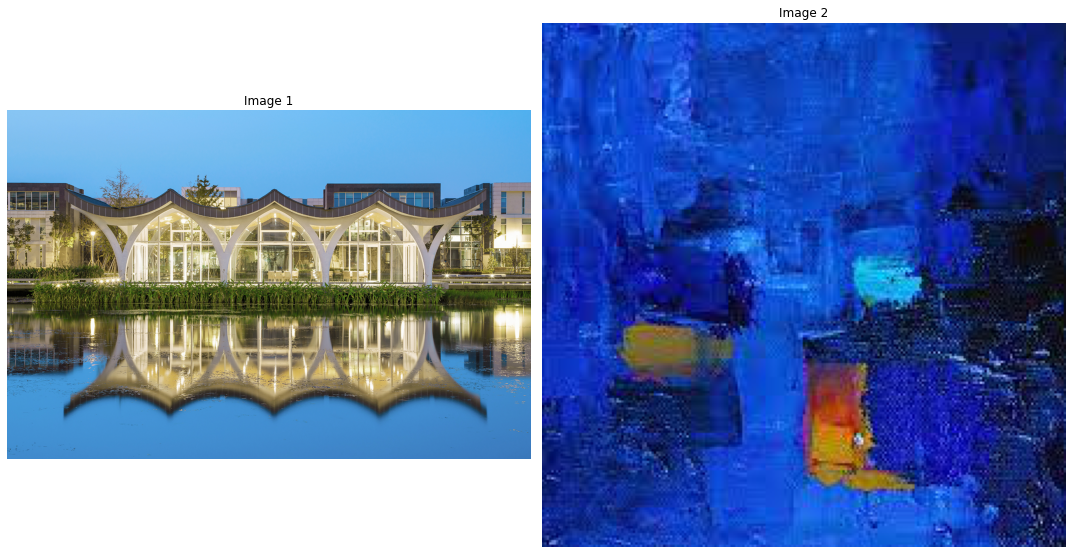

In [18]:
plt.figure(1, figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.axis('off')
plt.title('Image 2')
plt.tight_layout()

## Plot pixel values distribution



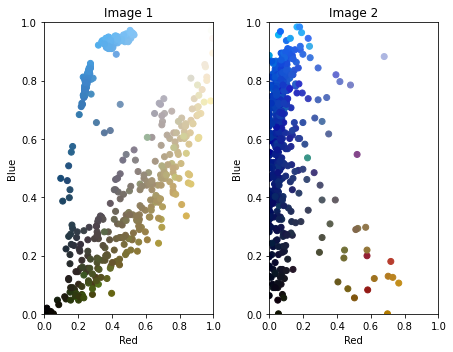

In [13]:
plt.figure(2, figsize=(6.4, 5))

plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Image 2')
plt.tight_layout()

## Plot transformed images



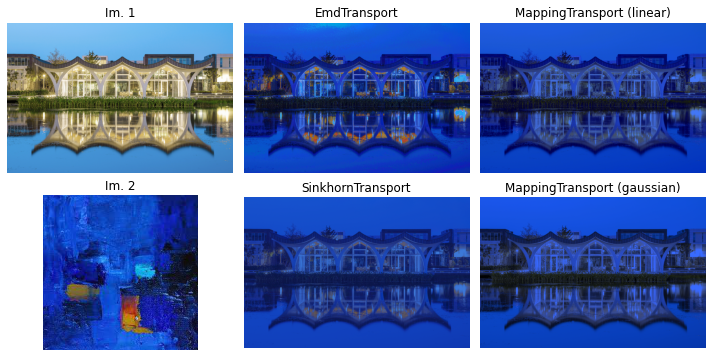

In [14]:
plt.figure(2, figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Im. 1')

plt.subplot(2, 3, 4)
plt.imshow(I2)
plt.axis('off')
plt.title('Im. 2')

plt.subplot(2, 3, 2)
plt.imshow(Image_emd)
plt.axis('off')
plt.title('EmdTransport')

plt.subplot(2, 3, 5)
plt.imshow(Image_sinkhorn)
plt.axis('off')
plt.title('SinkhornTransport')

plt.subplot(2, 3, 3)
plt.imshow(Image_mapping_linear)
plt.axis('off')
plt.title('MappingTransport (linear)')

plt.subplot(2, 3, 6)
plt.imshow(Image_mapping_gaussian)
plt.axis('off')
plt.title('MappingTransport (gaussian)')
plt.tight_layout()

plt.show()

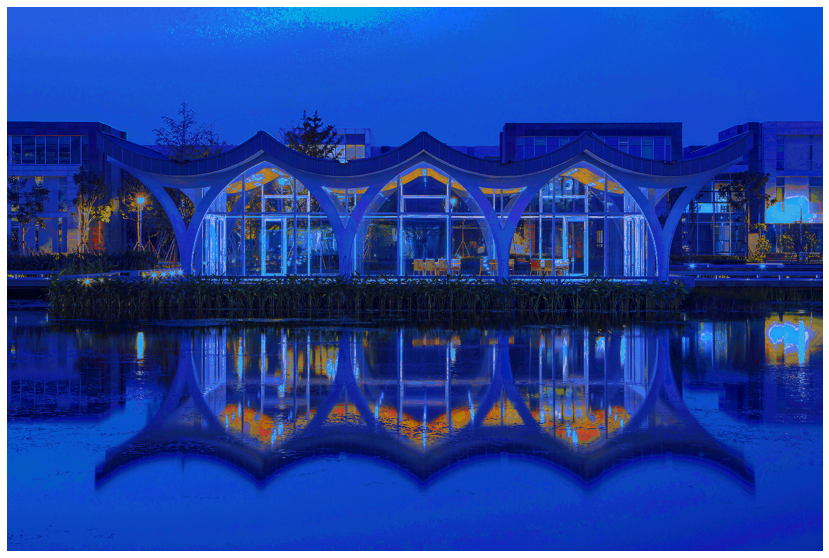

In [17]:
# fig, ax = plt.subplots(figsize=(15,10))
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(Image_emd)
plt.show()

In [ ]:
plt.figure(2, figsize=(6.4, 5))

plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Image 2')
plt.tight_layout()

In [ ]:
fig.savefig('figout/OutFig.jpeg',format='jpeg', dpi=1200)

In [97]:
import numpy.linalg as la 

In [111]:
A = np.array(
    [[1,23,4],
    [5,67,8],
    [9,101,12]]
)
B  = np.array(
    [
        [12,34,67],
        [14,5,6],
        [9,87,6]
    ]
)
I3 = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])
e1 = np.array([
    [1],
    [0],
    [0]
])

In [112]:
A.dot(B.T)

array([[1062,  153, 2034],
       [2874,  453, 5922],
       [4346,  703, 8940]])

In [113]:
B.dot(A.T)

array([[1062, 2874, 4346],
       [ 153,  453,  703],
       [2034, 5922, 8940]])

In [106]:
(A + 3*I3).dot(la.inv(A)).dot(e1)

array([[ 1.1 ],
       [-0.3 ],
       [ 2.45]])

In [110]:
la.det((A).dot(la.inv(A+ 3*I3)))

-0.30075187969924705

In [25]:
import networkx as nx

G = nx.Graph()
# G.add_edges_from([(1,2,{'weight':1}),(2,3,{'weight':12}),(3,1,{'weight':3})])
G.add_edges_from([((True,1), (False,2)), ((False,2), (True,3)), ((True,3), (False,4)), ((False,4),(True,1))])
G.add_edges_from([(1,4),(4,5),(5,1)])
# G.add_cycle([10,20,30])
# G.add_edge(1,10)
nx.find_cycle(G, (True,1))

[((True, 1), (False, 2)),
 ((False, 2), (True, 3)),
 ((True, 3), (False, 4)),
 ((False, 4), (True, 1))]

In [26]:
nx.find_cycle(G, (False,2))

[((False, 2), (True, 1)),
 ((True, 1), (False, 4)),
 ((False, 4), (True, 3)),
 ((True, 3), (False, 2))]

In [23]:
G[3][2]['weight']

12

In [27]:
((False, 2), (True, 3)) == ((True, 3),(False, 2))

False

In [17]:
G.remove_edge(2,3)
nx.find_cycle(G,1)

[(1, 4), (4, 5), (5, 1)]